# Customer Analysis Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

## Activity 3 - Wednesday 2023-01-18

### 1. Loading Data

In [2]:
# Load datasets individually
ma_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
ma_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
ma_df.drop(columns=['effective_to_date'], inplace=True)

In [4]:
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   month                          10689 non-null  object
 6   employment_status              10689 non-null  object
 7   gender                         10689 non-null  object
 8   income                         10689 non-null  int64 
 9   location_code                  10689 non-null  object
 10  marital_status                 10689 non-null  object
 11  monthly_premium_auto           10689 non-null  int64 
 12  months_since_last_claim        10689 non-null  int64 
 13  m

In [5]:
#In the column Vehicle Class, merge the two categories Luxury SUV and Luxury Car into one category named Luxury Vehicle
def merge_luxury(df):
    luxury = ['luxury suv', 'luxury car']
    df['vehicle_class'] = df['vehicle_class'].map(lambda x: ('luxury vehicle' if x in luxury else x))
    return df

In [6]:
ma_df = merge_luxury(ma_df)
ma_df.vehicle_class.unique()

array(['four-door car', 'suv', 'two-door car', 'sports car',
       'luxury vehicle'], dtype=object)

### 2. Separating Data

#### 2.1.Getting Numeric Data

In [7]:
# Define a function for identifying numerical columns
def get_num_cols(df):
    num_cols = df.select_dtypes(include = np.number).columns
    return num_cols

In [8]:
numerical = ma_df[get_num_cols(ma_df)]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [9]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

#### 2.1.Getting Categorical Data

In [10]:
# Define a function for identifying categorical columns
def get_cat_cols(df):
    cat_cols = df.select_dtypes(include = object).columns # "exlude = np.number" can also work
    return cat_cols

In [11]:
categorical = ma_df[get_cat_cols(ma_df)]
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


In [12]:
get_cat_cols(ma_df)

Index(['region', 'response', 'coverage', 'education', 'month',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 3. Checking for Correlation

In [13]:
# Get a the list of input features (excluding the target feature 'total_claim_amount')
input_feat = numerical.columns.tolist()
input_feat.remove('total_claim_amount')

In [14]:
input_feat

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [15]:
# Print out a correlation matrix
corr_matrix_input_feat = numerical[input_feat].corr()
print(corr_matrix_input_feat)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                 1.000000   
months_since_policy_inception              0.019696    

<AxesSubplot:>

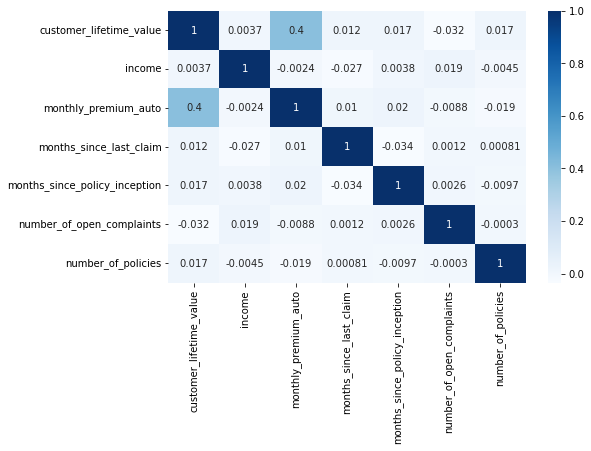

In [16]:
# Create a heatmap
fig3 = plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix_input_feat,annot=True, cmap='Blues') # Another choice of plette: cmap='coolwarm'

##### There is no pair of features that have a correlation greater than 0.9, then no features need to be dropped.

### 3. Encoding Categorical Data

In [17]:
# One-hot encoding
cat_one_hot = pd.get_dummies(categorical)
cat_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   region_central                   10689 non-null  uint8
 1   region_east                      10689 non-null  uint8
 2   region_north west                10689 non-null  uint8
 3   region_west region               10689 non-null  uint8
 4   response_no                      10689 non-null  uint8
 5   response_yes                     10689 non-null  uint8
 6   coverage_basic                   10689 non-null  uint8
 7   coverage_extended                10689 non-null  uint8
 8   coverage_premium                 10689 non-null  uint8
 9   education_bachelor               10689 non-null  uint8
 10  education_college                10689 non-null  uint8
 11  education_doctor                 10689 non-null  uint8
 12  education_high school or below   10689 non-nul

In [18]:
cat_one_hot

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury vehicle,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [19]:
cat_one_hot_drop_first = pd.get_dummies(categorical,\
                                        # The columns parameter specifies the columns to be one-hot encoded
                                        columns=categorical.columns,\
                                        # the prefix parameter specifies a prefix to be added to the column names
                                        prefix=categorical.columns,\
                                        # the first level of each categorical variable is dropped to avoid perfect multicollinearity
                                        drop_first=True)
cat_one_hot_drop_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   region_east                      10689 non-null  uint8
 1   region_north west                10689 non-null  uint8
 2   region_west region               10689 non-null  uint8
 3   response_yes                     10689 non-null  uint8
 4   coverage_extended                10689 non-null  uint8
 5   coverage_premium                 10689 non-null  uint8
 6   education_college                10689 non-null  uint8
 7   education_doctor                 10689 non-null  uint8
 8   education_high school or below   10689 non-null  uint8
 9   education_master                 10689 non-null  uint8
 10  month_jan                        10689 non-null  uint8
 11  employment_status_employed       10689 non-null  uint8
 12  employment_status_medical leave  10689 non-nul

In [20]:
# Label encoding using pandas.Series.cat.codes
cat_label = categorical.copy()
for col in categorical.columns:
    cat_label[col] = categorical[col].astype('category')
    cat_label[col] = cat_label[col].cat.codes
    
cat_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   region             10689 non-null  int8 
 1   response           10689 non-null  int8 
 2   coverage           10689 non-null  int8 
 3   education          10689 non-null  int8 
 4   month              10689 non-null  int8 
 5   employment_status  10689 non-null  int8 
 6   gender             10689 non-null  int8 
 7   location_code      10689 non-null  int8 
 8   marital_status     10689 non-null  int8 
 9   policy_type        10689 non-null  int8 
 10  policy             10689 non-null  int8 
 11  renew_offer_type   10689 non-null  int8 
 12  sales_channel      10689 non-null  int8 
 13  vehicle_class      10689 non-null  int8 
 14  vehicle_size       10689 non-null  int8 
dtypes: int8(15)
memory usage: 156.7 KB


In [21]:
# Label encoding using the astype method and cat.codes attribute of pandas
cat_label = categorical.copy()
for col in categorical.columns:
    cat_label[col] = categorical[col].astype('category')
    cat_label[col] = cat_label[col].cat.codes
    
cat_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   region             10689 non-null  int8 
 1   response           10689 non-null  int8 
 2   coverage           10689 non-null  int8 
 3   education          10689 non-null  int8 
 4   month              10689 non-null  int8 
 5   employment_status  10689 non-null  int8 
 6   gender             10689 non-null  int8 
 7   location_code      10689 non-null  int8 
 8   marital_status     10689 non-null  int8 
 9   policy_type        10689 non-null  int8 
 10  policy             10689 non-null  int8 
 11  renew_offer_type   10689 non-null  int8 
 12  sales_channel      10689 non-null  int8 
 13  vehicle_class      10689 non-null  int8 
 14  vehicle_size       10689 non-null  int8 
dtypes: int8(15)
memory usage: 156.7 KB


In [22]:
# Label encoding using the LabelEncoder class
cat_label_labelencoder = categorical.copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cat_label_labelencoder = categorical.apply(lambda x: label_encoder.fit_transform(x))
cat_label_labelencoder

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,0,0,1,0,1,1,1,1,0,2,2,0,0,1
1,3,0,0,1,1,4,0,1,2,1,5,3,2,0,1
2,1,0,0,0,0,1,1,1,2,1,5,2,2,3,1
3,2,1,1,1,1,1,1,1,2,0,2,1,1,0,1
4,2,0,2,0,1,2,0,1,1,1,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,2,0,1,4,0,1,1,1,3,2,3,1,1
10685,2,0,0,1,1,1,0,2,1,1,5,1,1,0,1
10686,0,0,1,0,0,1,0,0,1,0,2,0,3,1,1
10687,3,0,2,1,0,1,0,2,0,1,3,0,1,3,1


### 4. Transforming Numerical Data

#### 4.1. Min-Max Normalizing a Numerical Variable

In [37]:
# Convert a column of a Pandas DataFrame into a NumPy array
varA = numerical[['income']]

# Min-Max normalize `varA` manually
# varA_min_max_norm = (varA - np.min(varA)) / (np.max(varA) - np.min(varA))
# varA_min_max_norm

# Min-Max normalize `varA` using minmax_scale()
from sklearn.preprocessing import minmax_scale
varA_min_max_norm = minmax_scale(varA)
varA_min_max_norm

array([[0.42239616],
       [0.9141577 ],
       [0.13455039],
       ...,
       [0.33131726],
       [0.60213021],
       [0.6549075 ]])

Text(0.5, 1.0, 'Distribution of VarA')

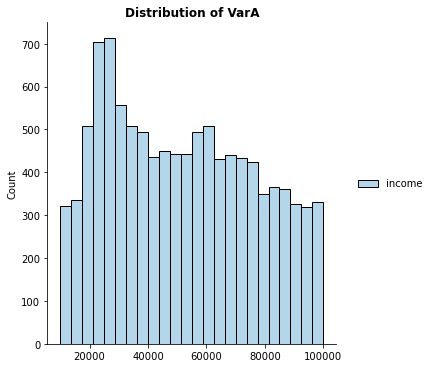

In [38]:
# creating a countplot for 'varA'
sns.displot(data = varA, palette='Blues')
plt.title('Distribution of VarA', fontweight = 'bold')

Text(0.5, 1.0, 'Distribution of Min-Max Normalized VarA')

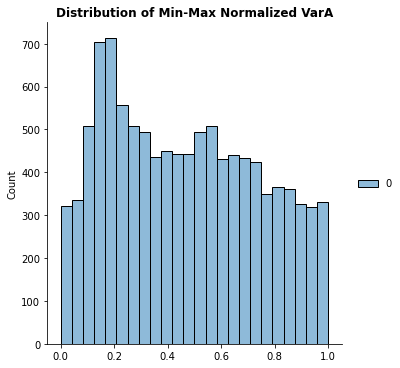

In [39]:
# creating a countplot for 'varA'
sns.displot(varA_min_max_norm)
plt.title('Distribution of Min-Max Normalized VarA', fontweight = 'bold')

#### 4.2. Standard Scalar Normalizing a Numerical Variable

In [26]:
# Select the column from the Pandas DataFrame as a DataFrame
varB = numerical[['customer_lifetime_value']]

from sklearn.preprocessing import StandardScaler

# Create an instance of the PowerTransformer class
scaler = StandardScaler()
# Fit the transformer to the DataFrame
scaler.fit(varB)
# Transform the DataFrame using the fitted transformer
varB_standard_scaler = scaler.transform(varB)

varB_standard_scaler

array([[-0.46572586],
       [-0.84102197],
       [ 1.00841284],
       ...,
       [ 2.3092261 ],
       [ 0.57568087],
       [-0.16793181]])

Text(0.5, 1.0, 'Distribution of VarB')

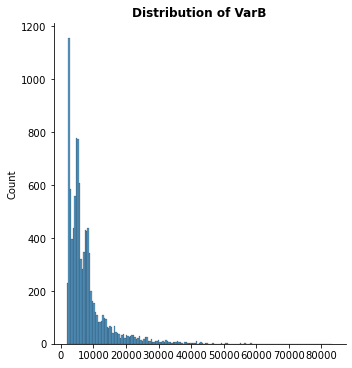

In [27]:
sns.displot(varB)
plt.title('Distribution of VarB', fontweight = 'bold')

Text(0.5, 1.0, 'Distribution of Standard Scalar Normalized VarB')

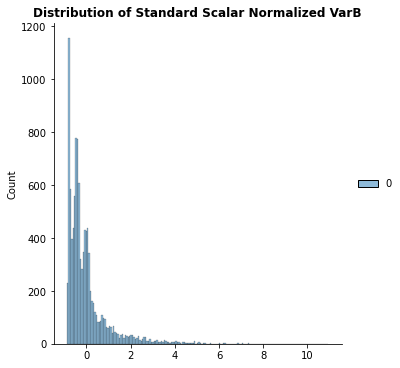

In [28]:
sns.displot(varB_standard_scaler)
plt.title('Distribution of Standard Scalar Normalized VarB', fontweight = 'bold')

In [29]:
# Check normalization

def check_norm(varB):
    # Check mean
    mean = np.mean(varB)
    print("Mean:", mean)
    
    # Check standard deviation
    std = np.std(varB)
    print("Standard Deviation:", std)

check_norm(varB_standard_scaler)

Mean: 1.595380826854e-17
Standard Deviation: 1.0


#### 4.3. Power Transform Normalizing a Numerical Variable

##### 4.3.1. Box-Cox Power Transform Normalization

In [36]:
varB = numerical[['customer_lifetime_value']]

from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='box-cox')

# Fit and transform the DataFrame using the 'box-cox' method
varB_box_cox = transformer.fit_transform(varB)

varB_box_cox

array([[-0.3361235 ],
       [-1.8672622 ],
       [ 1.29224877],
       ...,
       [ 1.79972704],
       [ 1.02172022],
       [ 0.24359579]])

Mean: -3.792353173834196e-15
Standard Deviation: 1.0


Text(0.5, 1.0, 'Distribution of Box-Cox Power Transform Nomalized VarB')

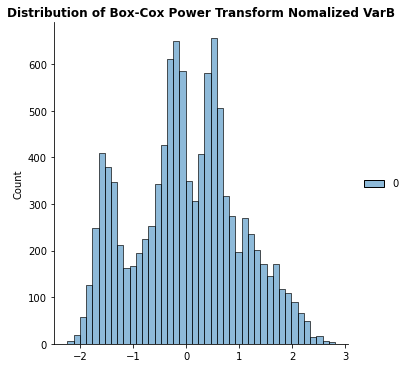

In [31]:
# Check normalization
check_norm(varB_box_cox)

# creating a countplot
sns.displot(varB_box_cox)
plt.title('Distribution of Box-Cox Power Transform Nomalized VarB', fontweight = 'bold')

##### 4.3.2. Yeo-Johnson Power Transform Normalization

In [35]:
# Convert a column of a Pandas DataFrame into a NumPy array
varB = numerical[['customer_lifetime_value']]

from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
varB_yeo_johnson = transformer.fit_transform(varB.reshape(-1, 1))

varB_yeo_johnson

array([[-0.33614341],
       [-1.86720472],
       [ 1.2922699 ],
       ...,
       [ 1.79973101],
       [ 1.0217405 ],
       [ 0.24359374]])

Mean: 4.18787467049175e-15
Standard Deviation: 1.0000000000000002


Text(0.5, 1.0, 'Distribution of Yeo-Johnson Power Transform Nomalized VarB')

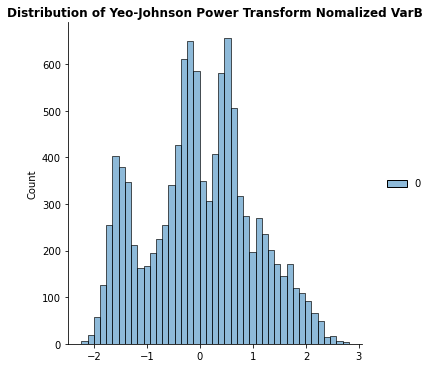

In [33]:
# checking normalization
check_norm(varB_yeo_johnson)

# creating a countplot
sns.displot(varB_yeo_johnson)
plt.title('Distribution of Yeo-Johnson Power Transform Nomalized VarB', fontweight = 'bold')